In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

### Prepare Dataframe

In [2]:
data = "merged_burglary_scores_2010_2025.csv"
df = pd.read_csv(data)

### Checking Missing Values

In [3]:
missing_values = df.isnull().sum()
missing_values

lsoa_code                                    0
year                                         0
Month_Num                                    0
Burglary_Count                               0
IMD SCORE                                 4214
EMPLOYMENT SCORE                          4214
EDUCATION SKILLS AND TRAINING SCORE       4214
INCOME SCORE                              4214
BARRIERS TO HOUSING AND SERVICES SCORE    4214
LIVING ENVIRONMENT SCORE                  4214
dtype: int64

In [4]:
total_number_rows = len(df)
total_number_rows

79092

In [5]:
#Total number of LSOA in dataframe
lsoa_count = df['lsoa_code'].unique()
len(lsoa_count)

5264

In [6]:
#LSOA with missing values
missing_rows = df[df.isnull().any(axis=1)]

lsoa_with_missing = missing_rows['lsoa_code'].unique()

lsoa_with_missing

array(['E01033784', 'E01033785', 'E01033786', 'E01033787', 'E01033788',
       'E01033789', 'E01033790', 'E01033791', 'E01033792', 'E01033805',
       'E01033862', 'E01033863', 'E01033864', 'E01033865', 'E01033866',
       'E01033867', 'E01033868', 'E01033869', 'E01033870', 'E01033871',
       'E01033872', 'E01033873', 'E01033874', 'E01033875', 'E01033876',
       'E01033877', 'E01033878', 'E01033879', 'E01033880', 'E01033881',
       'E01033882', 'E01033883', 'E01033884', 'E01033885', 'E01033911',
       'E01033912', 'E01033913', 'E01033914', 'E01033915', 'E01033916',
       'E01033917', 'E01033918', 'E01033919', 'E01033920', 'E01033921',
       'E01033922', 'E01033923', 'E01033924', 'E01033925', 'E01033926',
       'E01033927', 'E01033928', 'E01033929', 'E01033930', 'E01033931',
       'E01033932', 'E01033933', 'E01033934', 'E01033935', 'E01033936',
       'E01033937', 'E01033938', 'E01033939', 'E01033940', 'E01033941',
       'E01033942', 'E01033943', 'E01033944', 'E01033945', 'E010

In [7]:
#Number of LSOA that has missing value
len(lsoa_with_missing)

333

### drop the rows

In [8]:
cleaned_df = df.dropna()

### Basic Information about the dataset

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74878 entries, 0 to 74877
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lsoa_code                               74878 non-null  object 
 1   year                                    74878 non-null  int64  
 2   Month_Num                               74878 non-null  int64  
 3   Burglary_Count                          74878 non-null  int64  
 4   IMD SCORE                               74878 non-null  float64
 5   EMPLOYMENT SCORE                        74878 non-null  float64
 6   EDUCATION SKILLS AND TRAINING SCORE     74878 non-null  float64
 7   INCOME SCORE                            74878 non-null  float64
 8   BARRIERS TO HOUSING AND SERVICES SCORE  74878 non-null  float64
 9   LIVING ENVIRONMENT SCORE                74878 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 6.3+ MB


In [10]:
cleaned_df.head()

,lsoa_code,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE
0,E01000001,2011,6,1,6.16,0.01,0.21,0.01,32.6,26.28
1,E01000001,2011,8,1,6.16,0.01,0.21,0.01,32.6,26.28
2,E01000001,2011,12,2,6.16,0.01,0.21,0.01,32.6,26.28
3,E01000001,2012,1,1,6.16,0.01,0.21,0.01,32.6,26.28
4,E01000001,2012,3,2,6.16,0.01,0.21,0.01,32.6,26.28


In [11]:
cleaned_df.describe()

,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE
count,74878.000000,74878.000000,74878.000000,74878.000000,74878.000000,74878.000000,74878.000000,74878.000000,74878.000000
mean,2022.987006,6.757953,1.820909,22.475687,0.089689,12.960529,0.140600,32.186194,30.979514
std,1.055332,3.292072,1.463292,10.824436,0.047346,10.012798,0.075873,9.505871,11.289571
min,2010.000000,1.000000,1.000000,1.749000,0.003000,0.013000,0.006000,4.207000,1.680000
25%,2022.000000,4.000000,1.000000,13.604000,0.054000,4.762000,0.080000,25.336000,23.053000
50%,2023.000000,7.000000,1.000000,21.733000,0.082000,10.958000,0.131000,31.333000,30.226000
75%,2024.000000,10.000000,2.000000,30.555000,0.120000,18.942000,0.195000,38.688000,37.351000
max,2025.000000,12.000000,34.000000,64.677000,0.317000,83.905000,0.520000,70.456000,91.602000


In [12]:
#Total number of data
total_number_rows = len(cleaned_df)
total_number_rows

74878

In [13]:
#Total number of burglary
total_burglary = cleaned_df['Burglary_Count'].sum()
total_burglary

136346

In [14]:
#Number of LSOA
LSOA_list = cleaned_df['lsoa_code'].unique().tolist()
LSOA_count = len(LSOA_list)
LSOA_count

4931

In [15]:
#Data points per month
rows_per_month = df.groupby('Month_Num').size().reset_index(name='Row_Count')
rows_per_month

,Month_Num,Row_Count
0,1,5344
1,2,5018
2,3,5214
3,4,7076
4,5,7280
5,6,7032
6,7,7013
7,8,7158
8,9,7351
9,10,7612


In [44]:
#Data points per year
rows_per_year = df.groupby('year').size().reset_index(name='Row_Count')
rows_per_year

year
2010        4
2011       70
2012       56
2013       53
2014       54
2015       52
2016       50
2017       45
2018       50
2019       53
2020       44
2021       45
2022    21587
2023    30123
2024    26800
2025        6
dtype: int64

In [17]:
#Burglary count per month
monthly_burglaries = df.groupby('Month_Num')['Burglary_Count'].sum().reset_index()
monthly_burglaries

,Month_Num,Burglary_Count
0,1,10351
1,2,9131
2,3,9555
3,4,12518
4,5,13187
5,6,12861
6,7,12694
7,8,13314
8,9,13307
9,10,14027


In [18]:
#Burglary count per year
yearly_burglaries = df.groupby('year')['Burglary_Count'].sum().reset_index()
yearly_burglaries

,year,Burglary_Count
0,2010,8
1,2011,285
2,2012,344
3,2013,299
4,2014,231
5,2015,238
6,2016,239
7,2017,238
8,2018,306
9,2019,318


### Time period that needs attention

In [19]:
#Month that has high number of burglary than in average
mean_burglary = cleaned_df['Burglary_Count'].mean()
above_average_df = cleaned_df[cleaned_df['Burglary_Count'] > mean_burglary]
above_average_df

,lsoa_code,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE
2,E01000001,2011,12,2,6.160,0.010,0.210,0.010,32.600,26.280
4,E01000001,2012,3,2,6.160,0.010,0.210,0.010,32.600,26.280
7,E01000001,2012,7,8,6.160,0.010,0.210,0.010,32.600,26.280
14,E01000001,2014,7,4,6.160,0.010,0.210,0.010,32.600,26.280
17,E01000001,2015,6,2,6.063,0.015,0.021,0.011,27.134,34.502
...,...,...,...,...,...,...,...,...,...,...
74861,E01033745,2024,5,2,22.101,0.095,9.758,0.154,45.060,14.836
74864,E01033746,2022,4,2,21.824,0.085,6.379,0.145,23.996,45.728
74867,E01033746,2022,11,2,21.824,0.085,6.379,0.145,23.996,45.728
74869,E01033746,2023,2,4,21.824,0.085,6.379,0.145,23.996,45.728


In [20]:
#monthly average burglary count
monthly_avg = cleaned_df.groupby('Month_Num')['Burglary_Count'].mean()
monthly_avg

Month_Num
1     1.927291
2     1.820874
3     1.840621
4     1.764976
5     1.806372
6     1.816847
7     1.787408
8     1.844421
9     1.795248
10    1.824427
11    1.813827
12    1.848467
Name: Burglary_Count, dtype: float64

In [21]:
#yearly average burglary count
yearly_avg = cleaned_df.groupby('year')['Burglary_Count'].mean()
yearly_avg

year
2010    2.000000
2011    4.071429
2012    6.142857
2013    5.641509
2014    4.277778
2015    4.576923
2016    4.780000
2017    5.288889
2018    6.120000
2019    6.000000
2020    4.272727
2021    3.844444
2022    1.793157
2023    1.824034
2024    1.766136
2025    8.500000
Name: Burglary_Count, dtype: float64

In [22]:
#Month that has high number of burglary than 2
mean_burglary = cleaned_df['Burglary_Count'].mean()
above_average_df = cleaned_df[cleaned_df['Burglary_Count'] > 2]
above_average_df

,lsoa_code,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE
7,E01000001,2012,7,8,6.160,0.010,0.210,0.010,32.600,26.280
14,E01000001,2014,7,4,6.160,0.010,0.210,0.010,32.600,26.280
40,E01000001,2019,6,3,6.208,0.010,0.024,0.007,29.472,31.873
51,E01000001,2022,5,3,6.208,0.010,0.024,0.007,29.472,31.873
76,E01000002,2012,3,4,5.590,0.010,0.260,0.010,30.260,25.730
...,...,...,...,...,...,...,...,...,...,...
74836,E01033744,2022,7,4,29.363,0.119,17.868,0.184,37.315,14.174
74838,E01033744,2022,10,3,29.363,0.119,17.868,0.184,37.315,14.174
74847,E01033744,2023,10,4,29.363,0.119,17.868,0.184,37.315,14.174
74869,E01033746,2023,2,4,21.824,0.085,6.379,0.145,23.996,45.728


In [23]:
#months that has higher burglary compare to monthly average
cleaned_df['Monthly_Avg'] = cleaned_df['Month_Num'].map(monthly_avg)
above_monthly_avg = cleaned_df[cleaned_df['Burglary_Count'] > cleaned_df['Monthly_Avg']]
above_monthly_avg

C:\Users\KIM JINOK\AppData\Local\Temp\ipykernel_19652\3592021708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Monthly_Avg'] = cleaned_df['Month_Num'].map(monthly_avg)


,lsoa_code,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE,Monthly_Avg
2,E01000001,2011,12,2,6.160,0.010,0.210,0.010,32.600,26.280,1.848467
4,E01000001,2012,3,2,6.160,0.010,0.210,0.010,32.600,26.280,1.840621
7,E01000001,2012,7,8,6.160,0.010,0.210,0.010,32.600,26.280,1.787408
14,E01000001,2014,7,4,6.160,0.010,0.210,0.010,32.600,26.280,1.787408
17,E01000001,2015,6,2,6.063,0.015,0.021,0.011,27.134,34.502,1.816847
...,...,...,...,...,...,...,...,...,...,...,...
74861,E01033745,2024,5,2,22.101,0.095,9.758,0.154,45.060,14.836,1.806372
74864,E01033746,2022,4,2,21.824,0.085,6.379,0.145,23.996,45.728,1.764976
74867,E01033746,2022,11,2,21.824,0.085,6.379,0.145,23.996,45.728,1.813827
74869,E01033746,2023,2,4,21.824,0.085,6.379,0.145,23.996,45.728,1.820874


In [24]:
#years that has higher burglary compare to monthly average
cleaned_df['Yearly_Avg'] = cleaned_df['year'].map(yearly_avg)
above_yearly_avg = cleaned_df[cleaned_df['Burglary_Count'] > cleaned_df['Yearly_Avg']]
above_yearly_avg

C:\Users\KIM JINOK\AppData\Local\Temp\ipykernel_19652\3135026205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Yearly_Avg'] = cleaned_df['year'].map(yearly_avg)


,lsoa_code,year,Month_Num,Burglary_Count,IMD SCORE,EMPLOYMENT SCORE,EDUCATION SKILLS AND TRAINING SCORE,INCOME SCORE,BARRIERS TO HOUSING AND SERVICES SCORE,LIVING ENVIRONMENT SCORE,Monthly_Avg,Yearly_Avg
7,E01000001,2012,7,8,6.160,0.010,0.210,0.010,32.600,26.280,1.787408,6.142857
50,E01000001,2022,4,2,6.208,0.010,0.024,0.007,29.472,31.873,1.764976,1.793157
51,E01000001,2022,5,3,6.208,0.010,0.024,0.007,29.472,31.873,1.806372,1.793157
54,E01000001,2023,1,2,6.208,0.010,0.024,0.007,29.472,31.873,1.927291,1.824034
56,E01000001,2023,5,2,6.208,0.010,0.024,0.007,29.472,31.873,1.806372,1.824034
...,...,...,...,...,...,...,...,...,...,...,...,...
74861,E01033745,2024,5,2,22.101,0.095,9.758,0.154,45.060,14.836,1.806372,1.766136
74864,E01033746,2022,4,2,21.824,0.085,6.379,0.145,23.996,45.728,1.764976,1.793157
74867,E01033746,2022,11,2,21.824,0.085,6.379,0.145,23.996,45.728,1.813827,1.793157
74869,E01033746,2023,2,4,21.824,0.085,6.379,0.145,23.996,45.728,1.820874,1.824034


## Simple visualization
### Burglary distribution per time period

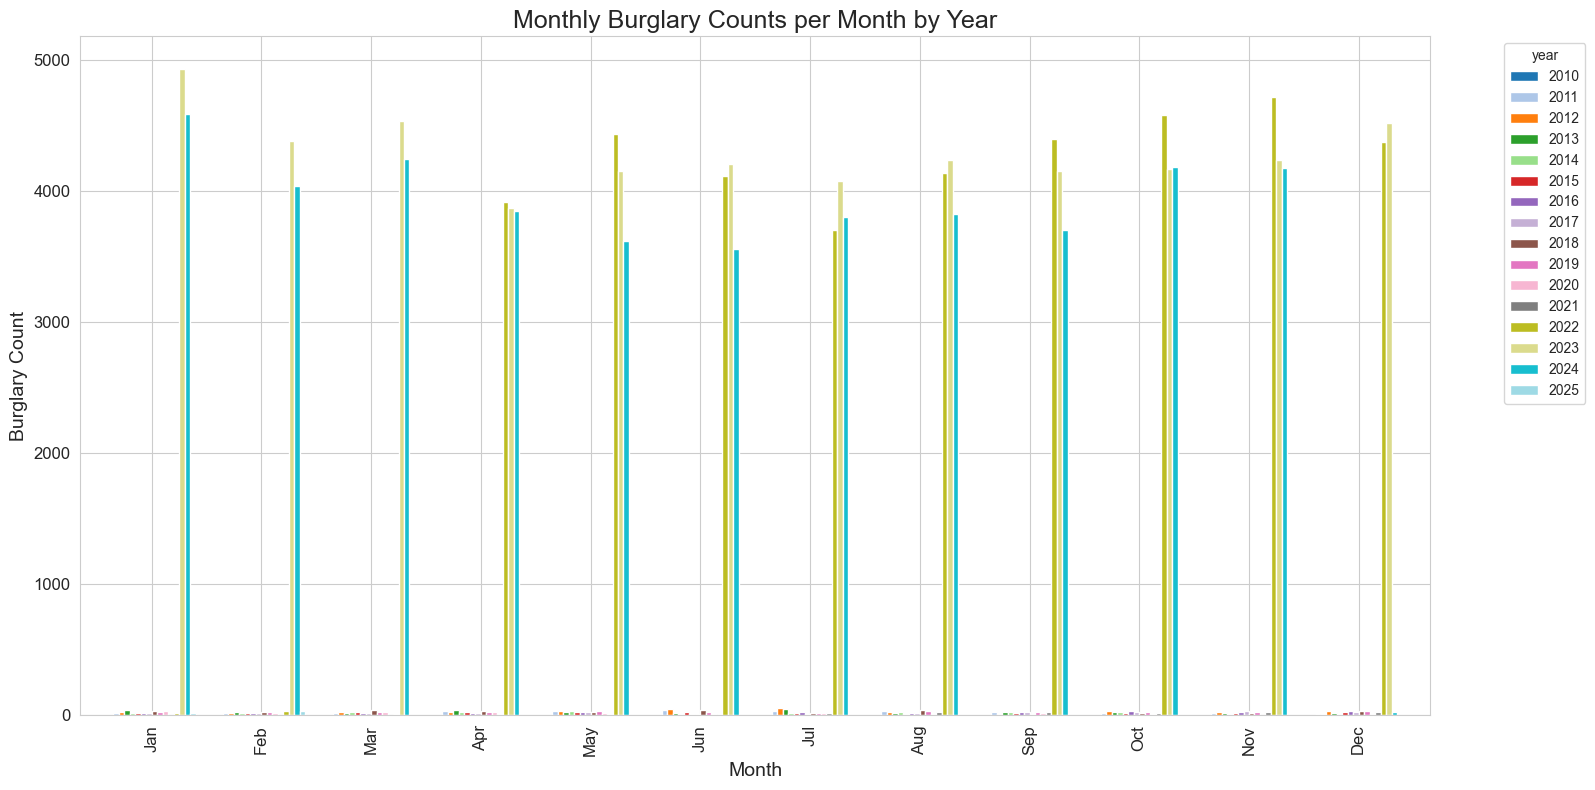

In [25]:
#Burglary distribution per month and year
sns.set_style("whitegrid")
df_grouped = cleaned_df.groupby(['year', 'Month_Num'], as_index=False)['Burglary_Count'].sum()

df_grouped['month_name'] = df_grouped['Month_Num'].apply(lambda x: calendar.month_abbr[x])

pivot_df = df_grouped.pivot(index='month_name', columns='year', values='Burglary_Count')

month_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']
pivot_df = pivot_df.reindex(month_order).dropna(how='all')

fig, ax = plt.subplots(figsize=(16, 8))
pivot_df.plot(kind='bar', ax=ax, width=0.8, colormap='tab20')

ax.set_title('Monthly Burglary Counts per Month by Year', fontsize=18)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Burglary Count', fontsize=14)

ax.legend(title='year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

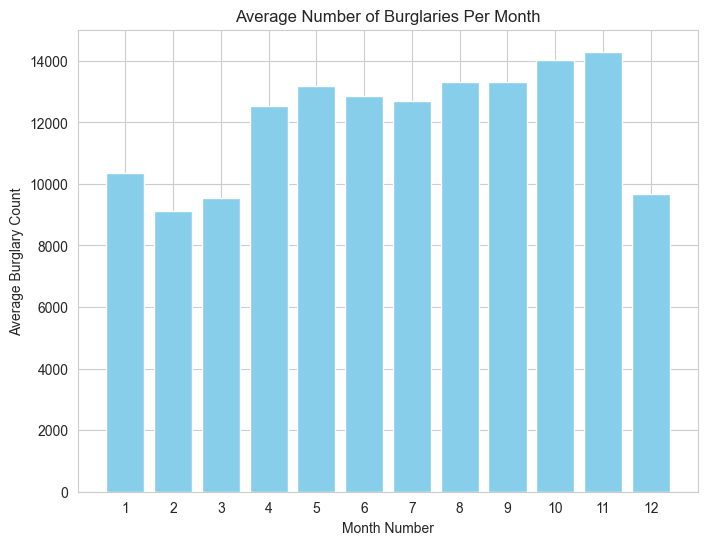

In [26]:
#Bar chart of number of burglary per month
plt.figure(figsize=(8, 6))
plt.bar(monthly_burglaries['Month_Num'], monthly_burglaries['Burglary_Count'], color='skyblue')
plt.xlabel('Month Number')
plt.ylabel('Average Burglary Count')
plt.title('Average Number of Burglaries Per Month')
plt.xticks(monthly_burglaries['Month_Num'])
plt.show()

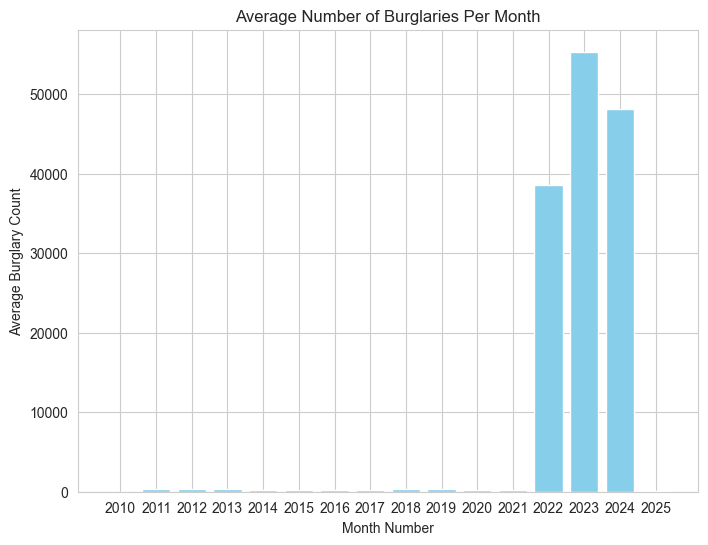

In [27]:
#Bar chart of number of burglary per year
plt.figure(figsize=(8, 6))
plt.bar(yearly_burglaries['year'], yearly_burglaries['Burglary_Count'], color='skyblue')
plt.xlabel('Month Number')
plt.ylabel('Average Burglary Count')
plt.title('Average Number of Burglaries Per Month')
plt.xticks(yearly_burglaries['year'])
plt.show()

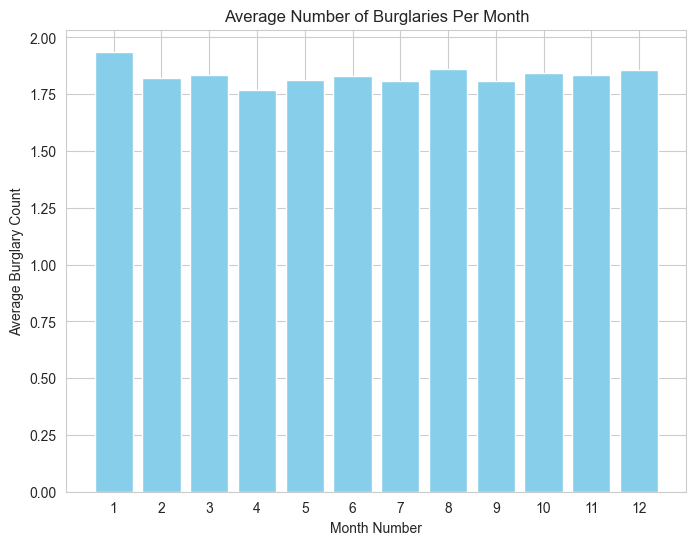

In [28]:
#Bar chart of average number of burglary per month
monthly_avg = df.groupby('Month_Num')['Burglary_Count'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(monthly_avg['Month_Num'], monthly_avg['Burglary_Count'], color='skyblue')
plt.xlabel('Month Number')
plt.ylabel('Average Burglary Count')
plt.title('Average Number of Burglaries Per Month')
plt.xticks(monthly_avg['Month_Num'])
plt.show()

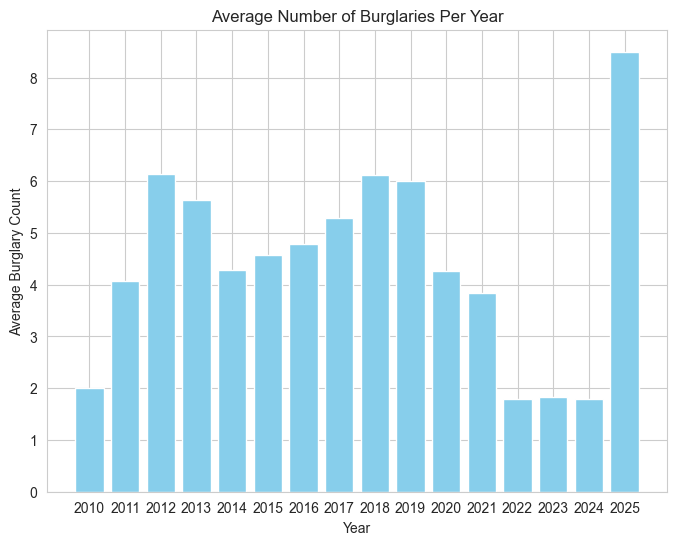

In [29]:
#Bar chart of average number of burglary per year
yearly_avg = df.groupby('year')['Burglary_Count'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(yearly_avg['year'], yearly_avg['Burglary_Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Burglary Count')
plt.title('Average Number of Burglaries Per Year')
plt.xticks(yearly_avg['year'])
plt.show()

### Burglary per LSOA

In [30]:
#Burglary count per LSOA
burglary_sum = cleaned_df.groupby('lsoa_code')['Burglary_Count'].sum().reset_index()
burglary_sum = burglary_sum.sort_values('Burglary_Count', ascending=False)
burglary_sum

,lsoa_code,Burglary_Count
4768,E01032739,2294
4769,E01032740,911
4635,E01004763,370
3,E01000005,352
4608,E01004734,310
...,...,...
4699,E01024184,1
4700,E01024186,1
4701,E01024189,1
4827,E01033217,1


In [31]:
#LSOAs that has higher burglary than average
average_burglary_count = burglary_sum['Burglary_Count'].mean()
above_average_lsoas = burglary_sum[burglary_sum['Burglary_Count'] > average_burglary_count]
above_average_lsoas

,lsoa_code,Burglary_Count
4768,E01032739,2294
4769,E01032740,911
4635,E01004763,370
3,E01000005,352
4608,E01004734,310
...,...,...
687,E01000703,28
2991,E01003062,28
3462,E01003543,28
1738,E01001784,28


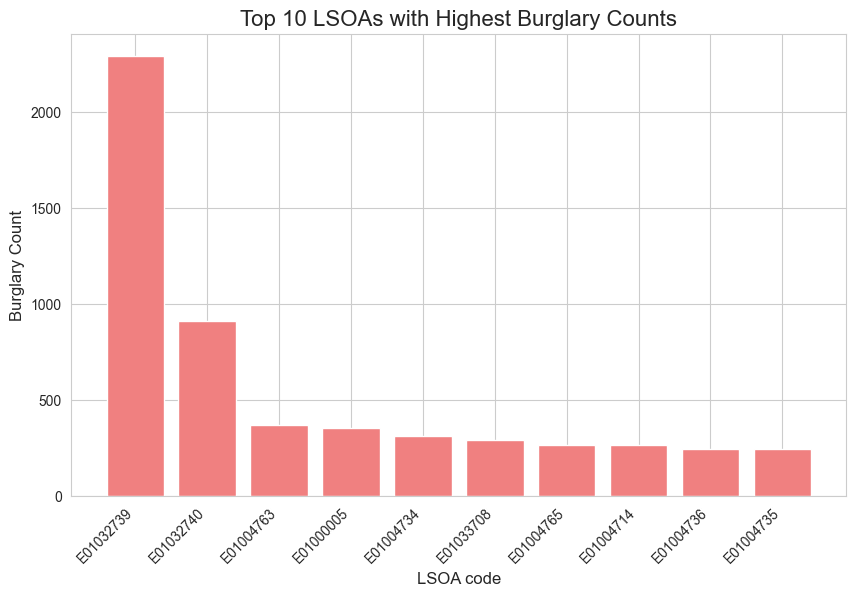

In [32]:
#Bar chart of first 10 LSOA with high burglary count
df_sorted = above_average_lsoas.sort_values(by='Burglary_Count', ascending=False)

top_10_lsoas = df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_lsoas['lsoa_code'], top_10_lsoas['Burglary_Count'], color='lightcoral')

plt.title('Top 10 LSOAs with Highest Burglary Counts', fontsize=16)
plt.xlabel('LSOA code', fontsize=12)
plt.ylabel('Burglary Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  

plt.show()

### Change in Socio-economical scores

In [33]:
def categorize_year(year):
    if 2010 <= year <= 2014:
        return '2010-2014'
    elif 2015 <= year <= 2018:
        return '2015-2018'
    elif 2019 <= year <= 2025:
        return '2019-2025'

cleaned_df['Year_Group'] = cleaned_df['year'].apply(categorize_year)

C:\Users\KIM JINOK\AppData\Local\Temp\ipykernel_19652\2743261285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Year_Group'] = cleaned_df['year'].apply(categorize_year)


In [34]:
#average socio-economical scores in time period
average_imd = cleaned_df.groupby('Year_Group')['IMD SCORE'].mean()
average_emp = cleaned_df.groupby('Year_Group')['EMPLOYMENT SCORE'].mean()
average_edu = cleaned_df.groupby('Year_Group')['EDUCATION SKILLS AND TRAINING SCORE'].mean()
average_income = cleaned_df.groupby('Year_Group')['INCOME SCORE'].mean()
average_housing = cleaned_df.groupby('Year_Group')['BARRIERS TO HOUSING AND SERVICES SCORE'].mean()
average_liv = cleaned_df.groupby('Year_Group')['LIVING ENVIRONMENT SCORE'].mean()

score_averages_df = pd.DataFrame({
    'Average IMD Score': average_imd,
    'Average Employment Score': average_emp,
    'Average Education & Training Score': average_edu,
    'Average Income Score': average_income,
    'Average Housing Score': average_housing,
    'Average Living Environment Score': average_liv
})

score_averages_df

,Average IMD Score,Average Employment Score,Average Education & Training Score,Average Income Score,Average Housing Score,Average Living Environment Score
Year_Group,,,,,,
2010-2014,15.903667,0.040835,6.857291,0.072916,33.790574,52.884274
2015-2018,15.945980,0.053574,4.773817,0.073980,32.065924,55.008751
2019-2025,22.513889,0.089941,13.001624,0.140992,32.181404,30.846190


### Correlation between socio-economical scores

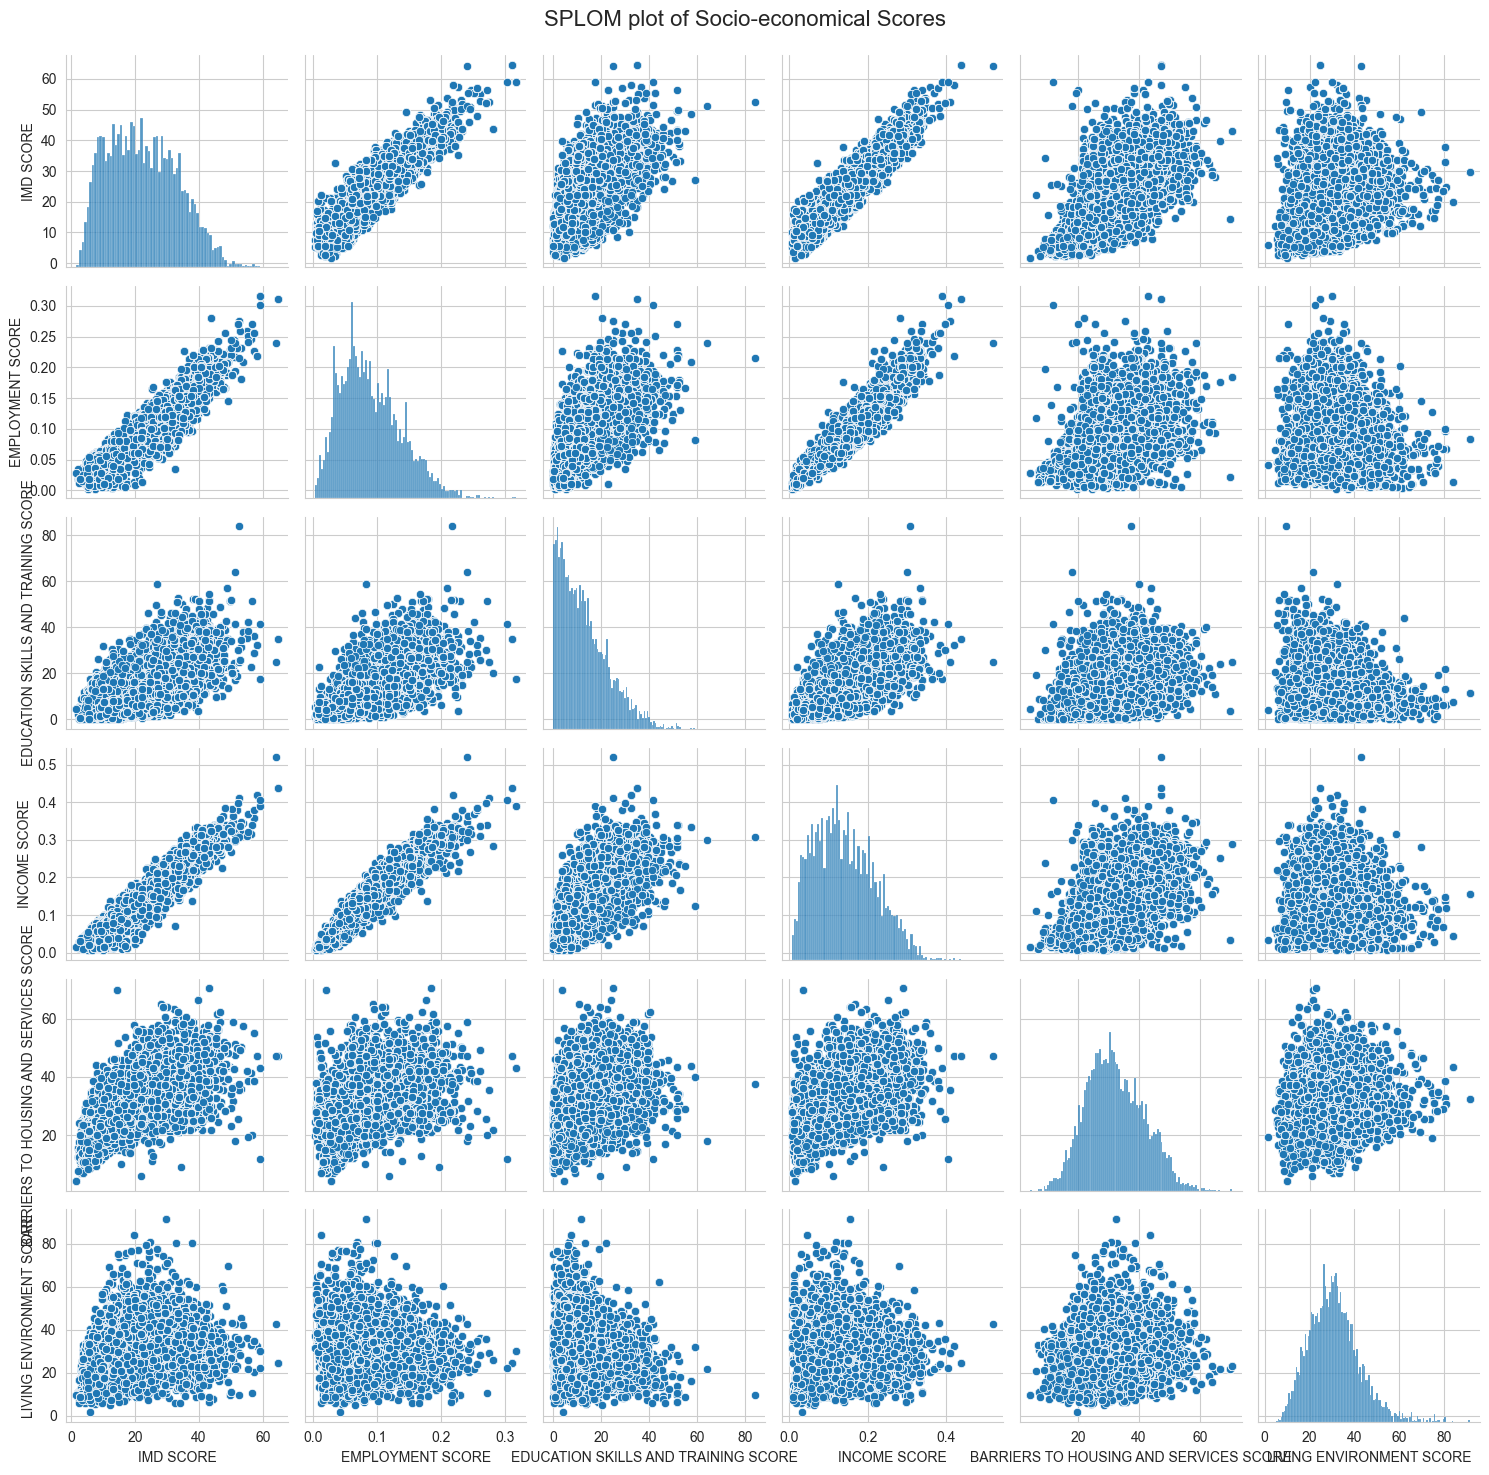

In [38]:
#SPLOM plot between scores
scores_df = cleaned_df[['IMD SCORE', 
                'EMPLOYMENT SCORE', 
                'EDUCATION SKILLS AND TRAINING SCORE', 
                'INCOME SCORE', 
                'BARRIERS TO HOUSING AND SERVICES SCORE', 
                'LIVING ENVIRONMENT SCORE']]

pair_plot = sns.pairplot(scores_df)
pair_plot.fig.suptitle("SPLOM plot of Socio-economical Scores", fontsize=16)

pair_plot.fig.tight_layout()
pair_plot.fig.subplots_adjust(top=0.95)
plt.show()

In [39]:
pair_plot.fig.savefig("SPLOM_scores.png")

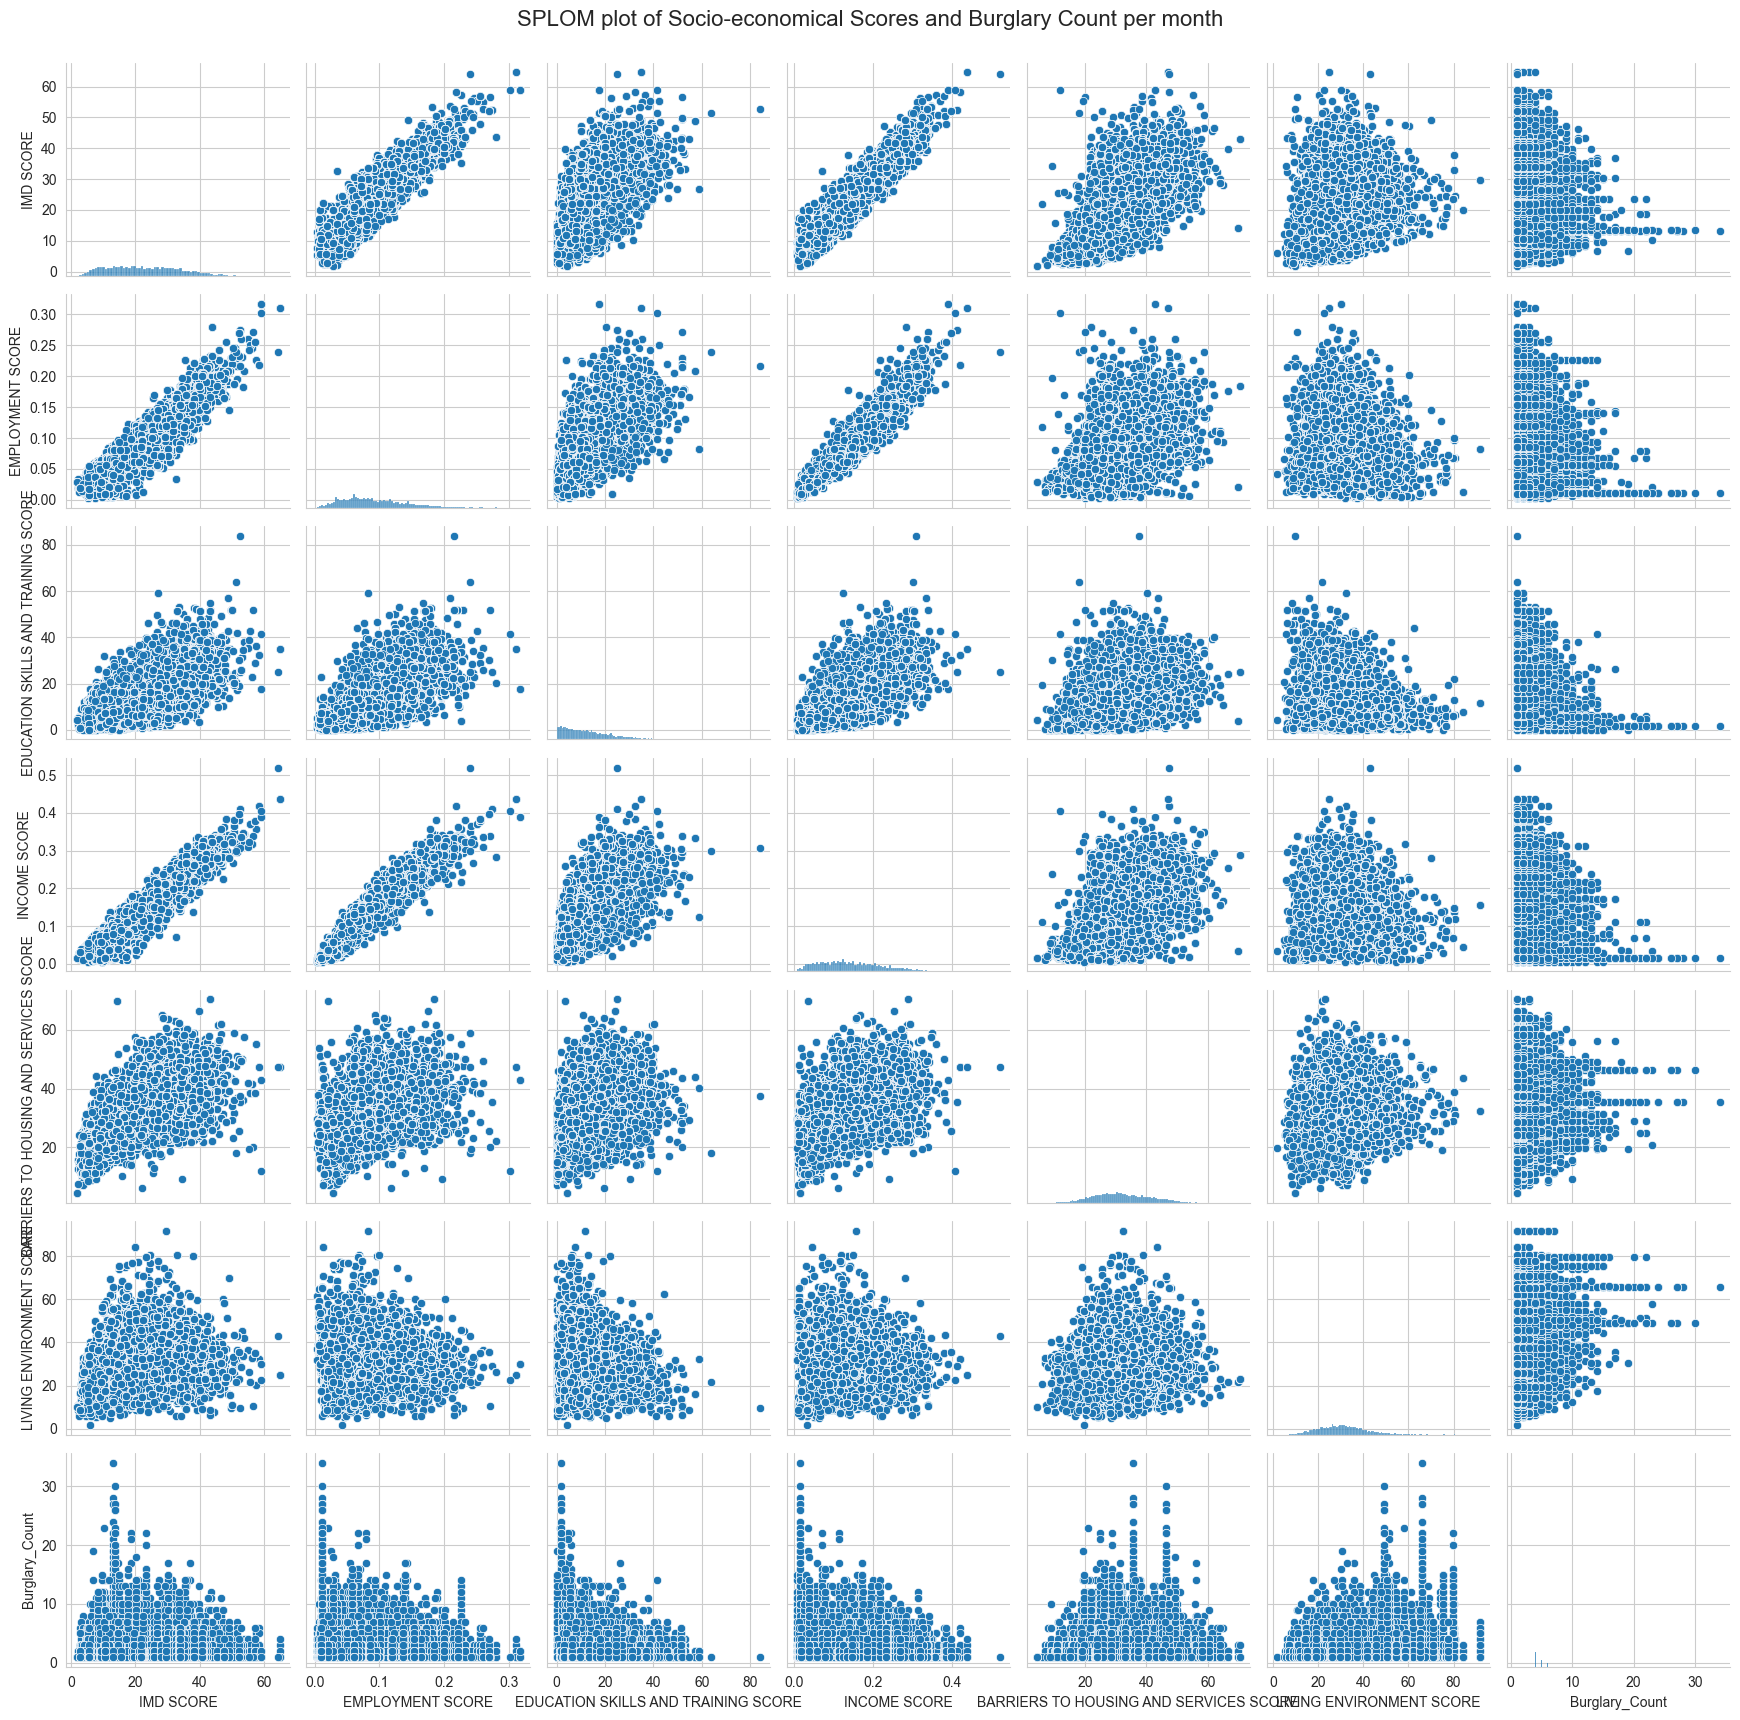

In [41]:
#SPLOM plot between scores and burglary count
scores_burglary_df = cleaned_df[['IMD SCORE', 
                'EMPLOYMENT SCORE', 
                'EDUCATION SKILLS AND TRAINING SCORE', 
                'INCOME SCORE', 
                'BARRIERS TO HOUSING AND SERVICES SCORE', 
                'LIVING ENVIRONMENT SCORE',
                'Burglary_Count']]

pair_plot2 = sns.pairplot(scores_burglary_df)
pair_plot2.fig.suptitle("SPLOM plot of Socio-economical Scores and Burglary Count per month", fontsize=16)

pair_plot2.fig.tight_layout()
pair_plot2.fig.subplots_adjust(top=0.95)
plt.show()

In [43]:
pair_plot2.fig.savefig("SPLOM_scores_burglary.png")